In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Jupiter Notebook que va a trabajar con un dataset del futbol argentino, entre los años 2015/2022. 
Este archivo trabaja con tres grafico usando Seaborn.

In [2]:
# leo el df
df=pd.read_csv("./afa_2015_2022_spa.csv", index_col=0,header=0,sep=",")
df


,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
torneo,,,,,,,,,,,,,,,,,,,,,
Campeonato 2015,1,1,Velez,Aldosivi,2,0,NaN,NaN,NaN,NaN,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,NaN,NaN,NaN,NaN,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
Campeonato 2015,1,3,San Lorenzo,Colon,2,0,NaN,NaN,NaN,NaN,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,NaN,NaN,NaN,NaN,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,NaN,NaN,NaN,NaN,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campeonato 2022,27,10,Patronato,Huracan,3,2,48.0,2.0,10.0,18.0,...,0.250000,24.750,1.781860,24.866667,0.244444,L,2022-10-23 17:00:00,6.13,1.57,3.98
Campeonato 2022,27,11,Barracas Central,Newells,1,1,55.0,4.0,10.0,11.0,...,0.230769,32.275,1.801316,22.923077,0.205128,E,2022-10-24 15:30:00,2.72,2.78,3.07
Campeonato 2022,27,12,Rosario Central,Colon,1,1,62.0,4.0,15.0,8.0,...,0.240741,43.575,1.804737,25.520833,0.163265,E,2022-10-24 16:30:00,2.21,3.26,3.41


Grafico Barploxt

Este grafico se está creando uno  de barras horizontales para mostrar los equipos que tuvieron el mayor porcentaje de posesión en los campeonatos.  

Se configura el gráfico de barras horizontales utilizando la función `sns.barplot()`, donde se especifica el eje 'x' como 'Posesión Total' y el eje 'y' como los equipos. Se utiliza el color 'blue' para representar las barras.
 

Este gráfico permite visualizar de manera comparativa el porcentaje de posesión de los equipos y determinar cuáles tuvieron un mayor control del balón durante los campeonatos.

In [5]:
# Guardo en la variable equipos, que va a ser una lista ( para no tener equipos repetidos)
# Luego  en una operacion llamada union , uno todo en la variable equipo
equipos = list(set(df['equipo_local']).union(set(df['equipo_visitante'])))

# inicializo el diccionario vacio
posesiones = {}

# recorro la lista equipos, para que a cada equpipo guarde la posesiom local y posesion visitante
for equipo in equipos:
    posesion_local = df[df['equipo_local'] == equipo]['posesion_local'].mean()
    posesion_visitante = df[df['equipo_visitante'] == equipo]['posesion_visitante'].mean()
    
    # si tengo Nan, va a tomar la media total de posesiin local ( para no distorcionar)
    if np.isnan(posesion_local):
        posesion_local = np.nanmean(df['posesion_local'])
    if np.isnan(posesion_visitante):
        posesion_visitante = np.nanmean(df['posesion_visitante'])
    # al diccionario que cree, en la clave eqipo le asigno las posesiones
    posesiones[equipo] = (posesion_local, posesion_visitante)

# muestro por pantalla con un bucle for( recorro el diccionario), tambien lo redondeo
for equipo, posesion in posesiones.items():
    print(f"Equipo: {equipo} - Posesión Local: {round(posesion[0])} - Posesión Visitante: {round(posesion[1])}")


Equipo: Sarmiento (J) - Posesión Local: 45 - Posesión Visitante: 38
Equipo: Patronato - Posesión Local: 43 - Posesión Visitante: 43
Equipo: Platense - Posesión Local: 44 - Posesión Visitante: 41
Equipo: Crucero (M) - Posesión Local: 51 - Posesión Visitante: 49
Equipo: Atl Rafaela - Posesión Local: 51 - Posesión Visitante: 49
Equipo: Huracan - Posesión Local: 48 - Posesión Visitante: 47
Equipo: San Martin (T) - Posesión Local: 46 - Posesión Visitante: 48
Equipo: Racing Club - Posesión Local: 60 - Posesión Visitante: 59
Equipo: Gimnasia (LP) - Posesión Local: 46 - Posesión Visitante: 44
Equipo: Argentinos - Posesión Local: 55 - Posesión Visitante: 55
Equipo: Olimpo - Posesión Local: 49 - Posesión Visitante: 42
Equipo: Tigre - Posesión Local: 51 - Posesión Visitante: 50
Equipo: San Lorenzo - Posesión Local: 50 - Posesión Visitante: 49
Equipo: Estudiantes (LP) - Posesión Local: 51 - Posesión Visitante: 49
Equipo: Belgrano - Posesión Local: 46 - Posesión Visitante: 40
Equipo: Talleres (C) -

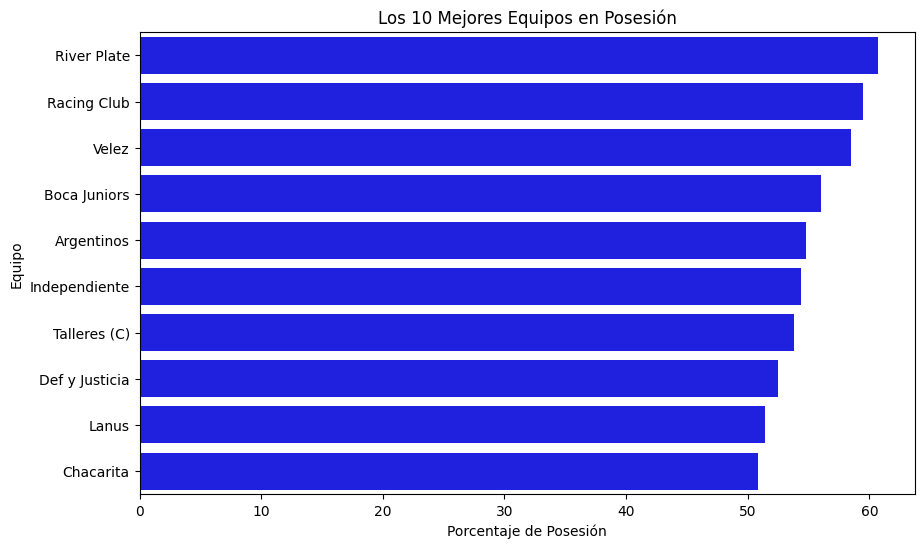

In [6]:
# sigue del grafico anteriror
# Calcular posesión total promedio para cada equipo

# creo un diccionario vacio, para guardar la posesion total promedio de cada equipo
posesion_total = {}
for equipo, posesion in posesiones.items():
    posesion_total[equipo] = (posesion[0] + posesion[1]) / 2

# Creo el df posesion, y le paso el dict, que cree anteriormente
# paso los parametros posesion total
posesion_df = pd.DataFrame.from_dict(posesion_total, orient='index', columns=['Posesión Total'])

# Ordeno los equipos por posesión total de forma descendente
# y seleccionar los mejores diez equipos
top_10_equipos = posesion_df.nlargest(10, 'Posesión Total')

# Creo el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
# uso el grafico y le paso los parametros, mas las customizaciones
sns.barplot(x='Posesión Total', y=top_10_equipos.index, data=top_10_equipos, color='blue')

# Configurar etiquetas y título
plt.xlabel('Porcentaje de Posesión')
plt.ylabel('Equipo')
plt.title('Los 10 Mejores Equipos en Posesión')

# Mostrar el gráfico
plt.show()




SCATTERPLOT
 

Este tipo de gráfico permite analizar la relación entre el monto de la apuesta y el pago resultante. Al observar la dispersión de los puntos en el gráfico, se puede identificar si existe alguna tendencia o patrón entre el monto apostado y el pago. Además, se pueden identificar valores atípicos o apuestas que ofrecen pagos significativamente altos o bajos en relación con el monto apostado.

 

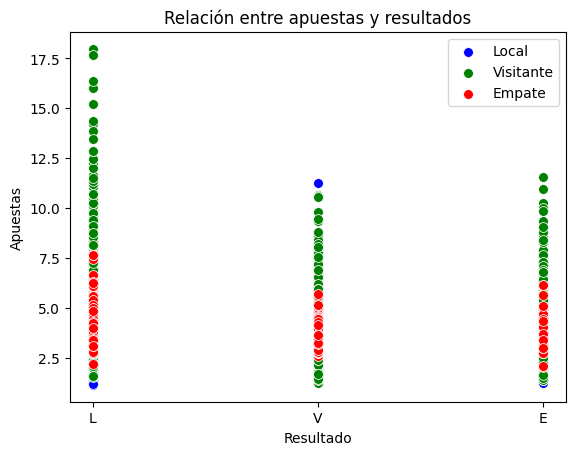

In [7]:
# creo un df, con las variables que necesito usar
df_5=df[['equipo_local','equipo_visitante','apuesta_local','apuesta_visitante','apuesta_empate','resultado']]

# asigno las variables y customizaciones respectivas
sns.scatterplot(y="apuesta_local", x="resultado", data=df_5, label="Local", s=50, color="blue")
sns.scatterplot(y="apuesta_visitante", x="resultado", data=df_5, label="Visitante", s=50, color="green")
sns.scatterplot(y="apuesta_empate", x="resultado", data=df_5, label="Empate", s=50, color="red")

# Título y etiquetas de los ejes
plt.title("Relación entre apuestas y resultados")
plt.ylabel("Apuestas")
plt.xlabel("Resultado")

# leyenda, y ubicaciones de la misma
plt.legend(loc="upper right", fontsize=10)

# Muestro  el gráfico
plt.show()



SCATERPLOT  

El gráfico representa la cantidad de puntos obtenidos por los equipos durante el período de 2015 a 2022. Se analizan los partidos ganados, perdidos y empatados para evaluar el rendimiento de los 10 mejores equipos.

Se seleccionan los 10 mejores equipos en términos de puntos obtenidos y se utiliza este conjunto de datos para compararlos con el gráfico previamente creado que muestra la posesión del balón. El objetivo es analizar la posible relación entre la posesión y el rendimiento en términos de puntos.
 
 

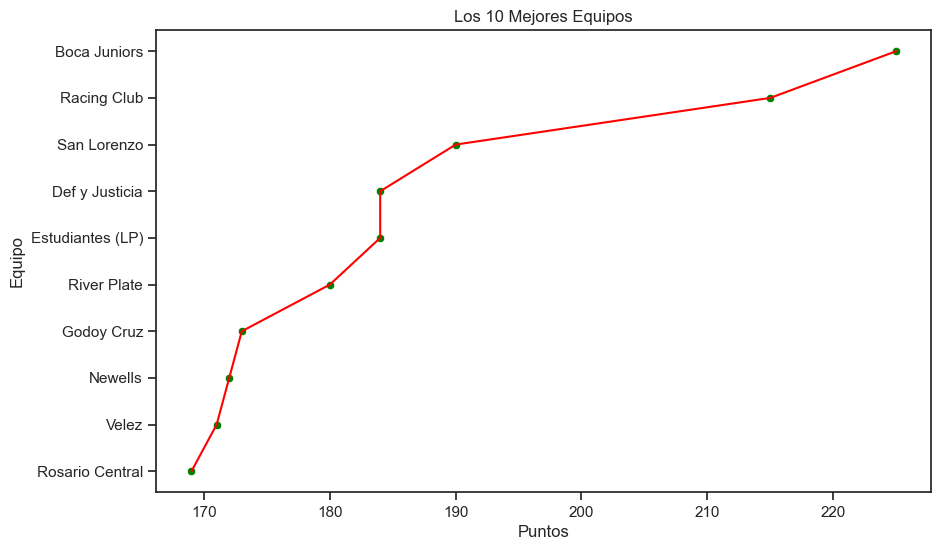

In [72]:
# Crear una tabla  para contar los resultados de los partidos por equipo

# le paso los parametros, columna index(equipo) values(resultado), funcion (countar)
tabla = pd.pivot_table(df, index=['equipo_local'], values=['resultado'], aggfunc='count')

# Renombro la columna 'resultado' por 'partidos_jugados' ()
tabla.rename(columns={'resultado': 'partidos_jugados'}, inplace=True)

# Calculo   el total de partidos ganados, empatados y perdidos por equipo, y agrupo por equipo
tabla['partidos_ganados'] = df.loc[df['resultado'] == 'L'].groupby('equipo_local')['resultado'].count()
tabla['partidos_empatados'] = df.loc[df['resultado'] == 'E'].groupby('equipo_local')['resultado'].count()
tabla['partidos_perdidos'] = df.loc[df['resultado'] == 'V'].groupby('equipo_local')['resultado'].count()

# Calculo el total de puntos por equipo
tabla['puntos'] = tabla['partidos_ganados'] * 3 + tabla['partidos_empatados']

# Reinicio el índice, para luego poder ordenarlos
tabla.reset_index(inplace=True)

# Ordeno la tabla por puntos descendente
tabla.sort_values('puntos', ascending=False, inplace=True)

# Mostrar la tabla resultante
#print(tabla[['equipo_local','puntos']].head(10))

# Obtener los datos de los diez mejores equipos
top_10_equipos = tabla.head(10)

# Creo el gráfico de puntos (scatter plot), y le paso los parametros a usar, y customizaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='puntos', y='equipo_local', data=top_10_equipos, color='green')

# Trazar una línea que conecte los puntos
plt.plot(top_10_equipos['puntos'], top_10_equipos['equipo_local'], color='red')

#Etiquetas y título
plt.xlabel('Puntos')
plt.ylabel('Equipo')
plt.title('Los 10 Mejores Equipos')

# Mostrar el gráfico
plt.show()
